In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU, BatchNormalization
from keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [4]:
data = pd.read_csv('./BSACTData.csv', index_col='Timestamp')
data = data.dropna()

In [3]:
data = pd.read_csv('./BSACTDataII.csv', index_col='Timestamp')
data = data.loc[:data.index[4999], :]

In [5]:
data['block-gen-mu'] = 560
data['block-gen-sig'] = 30
data['tx-gen-time'] = 26.66

In [6]:
data.head()

,mempool-size,transactions-per-second,median-confirmation-time,transaction-fees,n-transactions-per-block,block-gen-mu,tx-gen-time
Timestamp,,,,,,,
15-06-2016 00:00,21228973.0,2.433333,14.13,83.386147,1705.276316,560,26.66
16-06-2016 00:00,25873598.0,1.550000,9.66,82.296660,1797.785235,560,26.66
17-06-2016 00:00,26867610.0,2.350000,9.30,78.902095,1703.033557,560,26.66
18-06-2016 00:00,25255652.5,2.150000,7.75,70.578306,1489.348101,560,26.66
19-06-2016 00:00,7502073.5,2.250000,6.00,63.143491,1233.322034,560,26.66


In [7]:
data.shape

(1414, 7)

In [257]:
X = data.drop(columns=['median-confirmation-time', 'transaction-fees', 'n-transactions-per-block'])
Y = data.loc[:, ['median-confirmation-time']]

In [258]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [259]:
X_train.head()

,mempool-size,transactions-per-second,block-gen-mu,tx-gen-time
Timestamp,,,,
08-03-2018 00:00,21909306.5,2.233333,560,26.66
23-07-2018 00:00,157956.5,1.483333,560,26.66
14-10-2017 00:00,41604137.5,2.566667,560,26.66
02-08-2016 00:00,3247602.5,2.150000,560,26.66
17-11-2016 00:00,5396091.0,2.416667,560,26.66


In [260]:
def medianConfTimeModel():
    model = Sequential()
    model.add(Dense(50, input_dim=4, kernel_initializer='normal'))
    model.add(LeakyReLU())
    model.add(BatchNormalization())

    model.add(Dense(100, kernel_initializer='normal'))
    model.add(LeakyReLU())
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(30, kernel_initializer='normal'))
    model.add(LeakyReLU())
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(1, kernel_initializer='normal'))
    model.add(LeakyReLU())
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [261]:
def transactionFeesModel():
    model = Sequential()
    model.add(Dense(50, input_dim=4, kernel_initializer='normal'))
    model.add(LeakyReLU())
    model.add(BatchNormalization())

    model.add(Dense(100, kernel_initializer='normal'))
    model.add(Dropout(0.2))

    model.add(Dense(30, kernel_initializer='normal'))
    model.add(Dropout(0.2))

    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [262]:
def numTransactionsPerSecModel():
    model = Sequential()
    model.add(Dense(100, input_dim=4, kernel_initializer='normal'))
    model.add(LeakyReLU())
    model.add(BatchNormalization())

    model.add(Dense(100, kernel_initializer='normal'))
    model.add(LeakyReLU())
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(500, kernel_initializer='normal'))
    model.add(LeakyReLU())
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(100, kernel_initializer='normal'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(30, kernel_initializer='normal'))
    model.add(LeakyReLU())
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(10, kernel_initializer='normal'))
    model.add(LeakyReLU())

    model.add(Dense(1, kernel_initializer='normal'))
    model.add(LeakyReLU())
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [247]:
model = Sequential()
model.add(Dense(100, input_dim=4, kernel_initializer='normal'))
model.add(LeakyReLU())
model.add(BatchNormalization())

model.add(Dense(100, kernel_initializer='normal'))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(500, kernel_initializer='normal'))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(100, kernel_initializer='normal'))
# model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(30, kernel_initializer='normal'))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(10, kernel_initializer='normal'))
model.add(LeakyReLU())

model.add(Dense(1, kernel_initializer='normal'))
model.add(LeakyReLU())
# model.add(BatchNormalization())
model.compile(loss='mean_squared_error', optimizer='adam')

In [248]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_99 (Dense)             (None, 100)               500       
_________________________________________________________________
leaky_re_lu_83 (LeakyReLU)   (None, 100)               0         
_________________________________________________________________
batch_normalization_45 (Batc (None, 100)               400       
_________________________________________________________________
dense_100 (Dense)            (None, 100)               10100     
_________________________________________________________________
leaky_re_lu_84 (LeakyReLU)   (None, 100)               0         
_________________________________________________________________
batch_normalization_46 (Batc (None, 100)               400       
_________________________________________________________________
dropout_13 (Dropout)         (None, 100)               0         
__________

In [249]:
early_stopping_monitor = EarlyStopping(patience=3)
model.fit(X_train, Y_train, validation_split=0.2, epochs=50, callbacks=[early_stopping_monitor]);
# model.fit(X_train, Y_train, validation_split=0.2, epochs=30);

Train on 904 samples, validate on 227 samples
Epoch 1/50
904/904 [==============================] - 6s 7ms/step - loss: 3594276.2832 - val_loss: 3581310.5253
Epoch 2/50
904/904 [==============================] - 0s 436us/step - loss: 3593322.5951 - val_loss: 3577002.0958
Epoch 3/50
904/904 [==============================] - 0s 424us/step - loss: 3590647.5000 - val_loss: 3567974.2412
Epoch 4/50
904/904 [==============================] - 0s 378us/step - loss: 3584935.2544 - val_loss: 3541919.2588
Epoch 5/50
904/904 [==============================] - 0s 376us/step - loss: 3575294.3540 - val_loss: 3509289.2599
Epoch 6/50
904/904 [==============================] - 0s 379us/step - loss: 3560653.9358 - val_loss: 3468932.2302
Epoch 7/50
904/904 [==============================] - 0s 372us/step - loss: 3540454.6814 - val_loss: 3423612.8811
Epoch 8/50
904/904 [==============================] - 0s 376us/step - loss: 3512204.1925 - val_loss: 3399852.4581
Epoch 9/50
904/904 [========================

## Train Data

In [263]:
Y_pred = model.predict(X_train)

In [264]:
np.linalg.norm(np.array(Y_pred - Y_train))/np.linalg.norm(np.array(Y_train))

0.4974152001023745

In [265]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

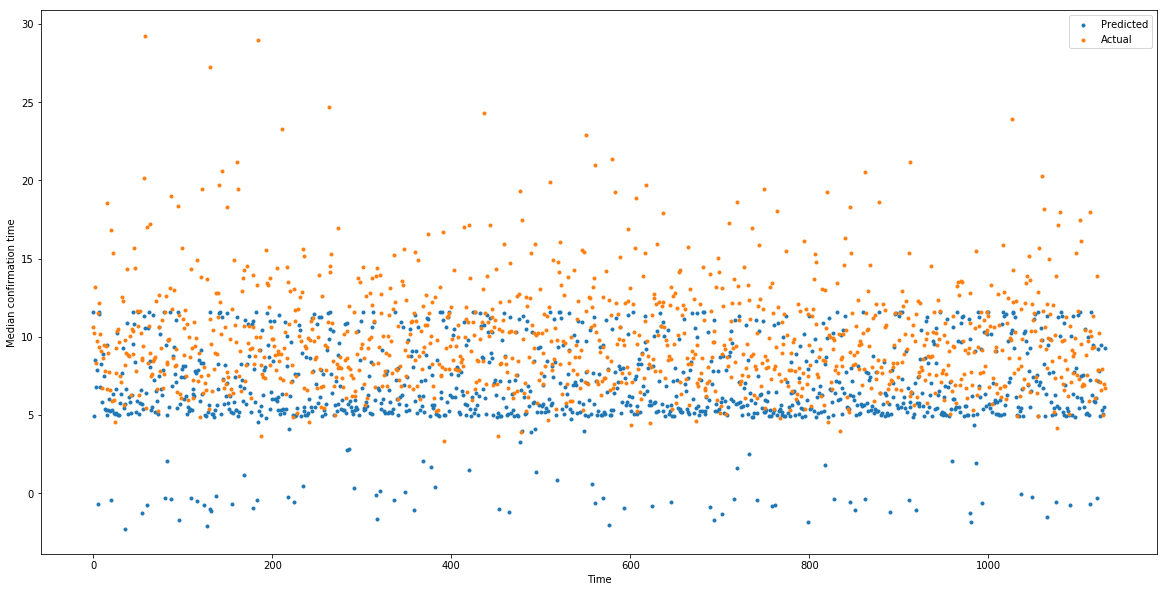

In [266]:
X = np.arange(len(Y_pred))
plt.scatter(X, np.array(Y_pred), label='Predicted', marker='.')
plt.scatter(X, Y_train, label='Actual', marker='.')
plt.legend()
plt.xlabel('Time')
# plt.ylabel('Median confirmation time')
# plt.ylabel('Transaction Fees')
# plt.ylabel('Num transactions per second')
plt.show()

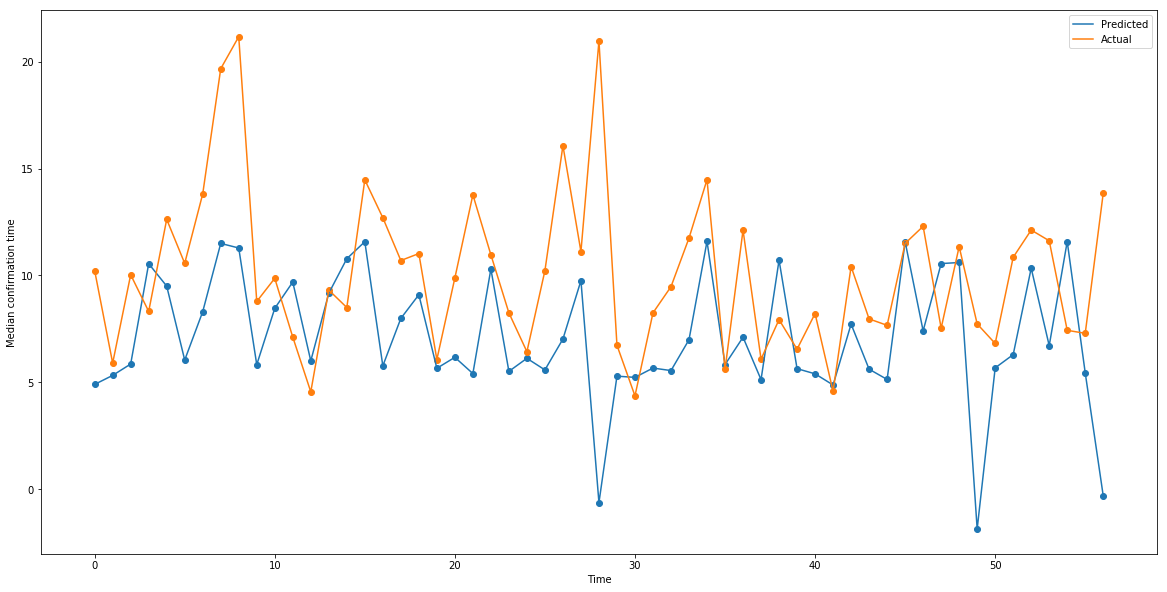

In [267]:
Y_pred = model.predict(X_train)
yp = [Y_pred[i] for i in range(len(Y_pred)) if i%20 == 1]
yt = [Y_train.values[i] for i in range(len(Y_train)) if i%20 == 1]
xx = np.arange(len(yp))

plt.scatter(xx, yp)
plt.scatter(xx, yt)
plt.plot(xx, yp, label='Predicted')
plt.plot(xx, yt, label='Actual')
plt.legend()
plt.xlabel('Time')
# plt.ylabel('Median confirmation time')
# plt.ylabel('Transaction Fees')
# plt.ylabel('Num transactions per second')
# plt.savefig('plots/train1.png')
plt.show()

## Test data

In [268]:
Y_pred = model.predict(X_test)

In [269]:
np.linalg.norm(np.array(Y_pred - Y_test))/np.linalg.norm(np.array(Y_test))

0.519075010280604

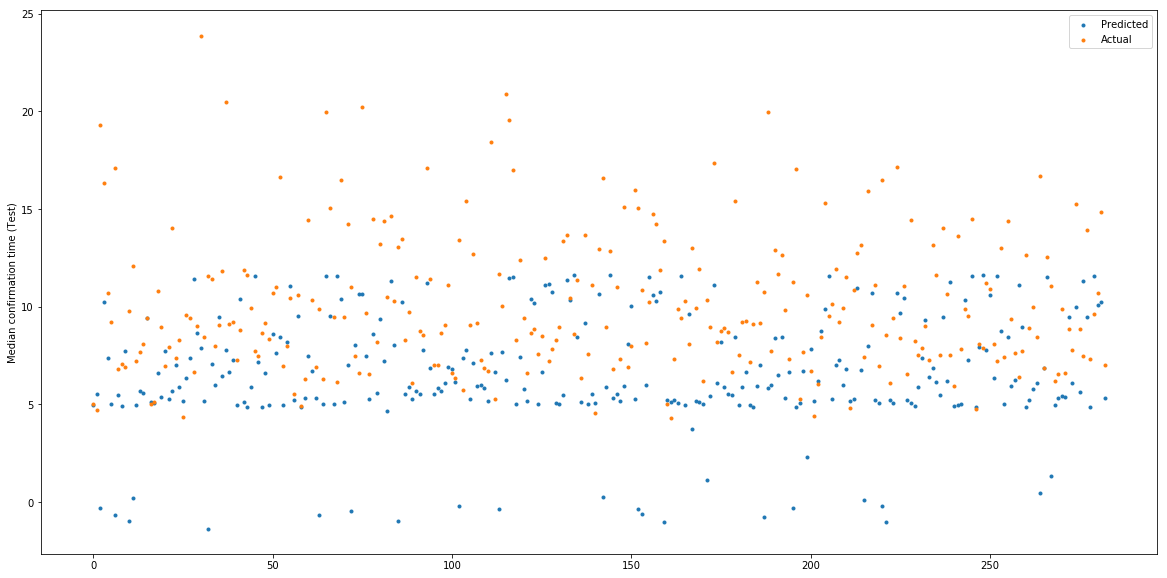

In [270]:
X = np.arange(len(Y_pred))
plt.scatter(X, Y_pred, label='Predicted', marker='.')
plt.scatter(X, Y_test, label='Actual', marker='.')
# plt.ylabel('Median confirmation time (Test)')
# plt.ylabel('Transaction Fees (Test)')
# plt.ylabel('Num transactions per second (Test)')
plt.legend()
plt.show()

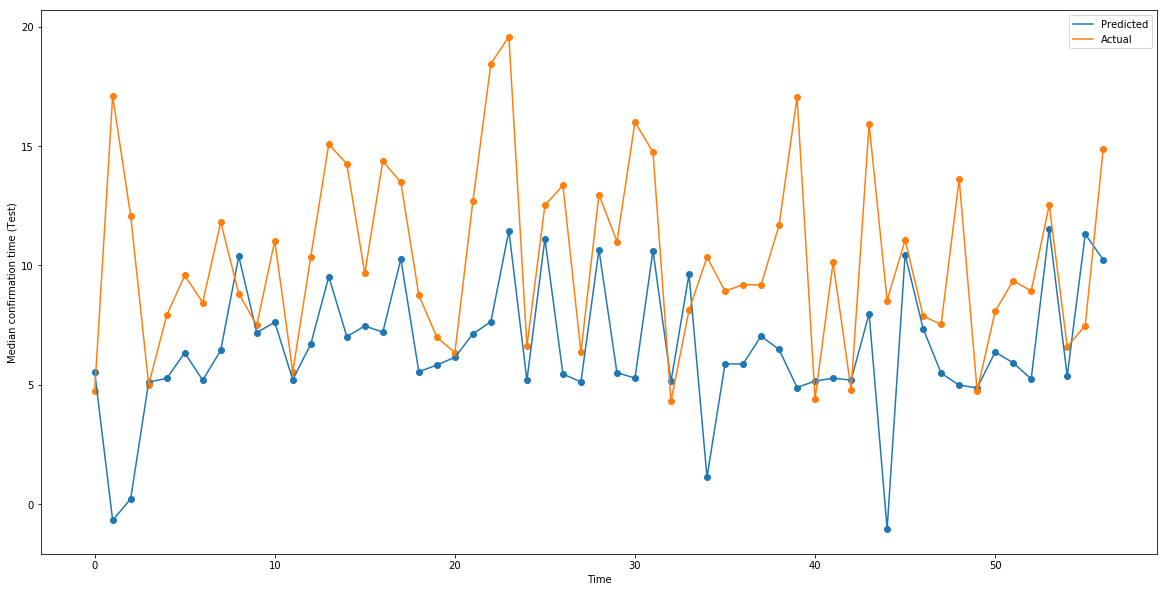

In [271]:
Y_pred = model.predict(X_test)
yp = [Y_pred[i] for i in range(len(Y_pred)) if i%5 == 1]
yt = [Y_test.values[i] for i in range(len(Y_test)) if i%5 == 1]
xx = np.arange(len(yp))

plt.scatter(xx, yp)
plt.scatter(xx, yt)
plt.plot(xx, yp, label='Predicted')
plt.plot(xx, yt, label='Actual')
plt.legend()
plt.xlabel('Time')
# plt.ylabel('Median confirmation time (Test)')
# plt.ylabel('Transaction Fees (Test)')
# plt.ylabel('Num transactions per second (Test)')
# plt.savefig('plots/test1.png')
plt.show()

In [84]:
# model.save('weights/numTransactions.hfpy')

## TODOs
- handle -ve median conf times
- model gives -ve values more
- L2 regularization
- use prev y values to develop a time series model
- explore genetic algorithms

In [85]:
from keras.models import load_model

In [256]:
model = load_model('weights/MedianConfTime.hfpy')
# model = load_model('weights/TransactionFees.hfpy')
# model = load_model('weights/numTransactions.hfpy')

In [167]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 50)                250       
_________________________________________________________________
leaky_re_lu_61 (LeakyReLU)   (None, 50)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 50)                200       
_________________________________________________________________
dense_68 (Dense)             (None, 100)               5100      
_________________________________________________________________
leaky_re_lu_62 (LeakyReLU)   (None, 100)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dropout_22 (Dropout)         (None, 100)               0         
__________